In [2]:
import pandas as pd
import numpy as np
import warnings
import scipy
import matplotlib.pyplot as plt
from safeaipackage import check_accuracy, check_robustness
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

warnings.filterwarnings('ignore')
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 10000)

In [21]:
data = pd.read_excel("D:/files/research_activities/ORGANIZED_FILES/safeaipackage/employee.xlsx")
print("This dataset has {} rows and {} columns".format(data.shape[0], data.shape[1]))
data.head()

This dataset has 473 rows and 9 columns


,salary,age,edu,startsal,jobtime,prevexp,minority,gender,jobcat
0,57000,36,15,27000,98,144,no_min,m,manager
1,40200,30,16,18750,98,36,no_min,m,Clerical
2,21450,59,12,12000,98,381,no_min,f,Clerical
3,21900,41,8,13200,98,190,no_min,f,Clerical
4,45000,33,15,21000,98,138,no_min,m,Clerical


In [22]:
data["gender_"] = np.where(data["gender"]=="m", 0, 1)
data["minority_"] = np.where(data["minority"]=="no_min", 0, 1)
data = pd.get_dummies(data, columns=["jobcat"])
data.drop(["gender", "minority"], axis=1, inplace=True)
data.head()

,salary,age,edu,startsal,jobtime,prevexp,gender_,minority_,jobcat_Clerical,jobcat_Custodial,jobcat_manager
0,57000,36,15,27000,98,144,0,0,0,0,1
1,40200,30,16,18750,98,36,0,0,1,0,0
2,21450,59,12,12000,98,381,1,0,1,0,0
3,21900,41,8,13200,98,190,1,0,1,0,0
4,45000,33,15,21000,98,138,0,0,1,0,0


In [23]:
data["promoted"] = np.where(data["salary"]/data["startsal"] > 2,1,0)
data = data.drop(["salary", "startsal"], axis=1)

data["promoted"].value_counts()

0    253
1    220
Name: promoted, dtype: int64

In [14]:
def rga(y, yhat):
    y = pd.DataFrame(y).reset_index(drop=True)
    yhat = pd.DataFrame(yhat).reset_index(drop=True)
    df = pd.concat([y,yhat], axis=1)
    df.columns = ["y", "yhat"]
    ryhat = yhat.rank(method="min")
    df["ryhat"] = ryhat
    support = df.groupby('ryhat')['y'].mean().reset_index(name='support')
    rord = list(range(len(y)))
    for jj in range(len(rord)):
        for ii in range(len(support)):
                if df["ryhat"][jj]== support['ryhat'][ii]:
                    rord[jj] = support['support'][ii]
    vals = [[i, values] for i, values in enumerate(df["yhat"])]
    ranks = [x[0] for x in sorted(vals, key= lambda item: item[1])]
    ystar = [rord[i] for i in ranks]
    I = list(range(len(y)))
    conc = 2*sum([I[i]*ystar[i] for i in range(len(I))])
    dec= 2*sum([sorted(df["y"], reverse=True)[i]*I[i] for i in range(len(I))]) # second term of the RGA numerator and denominator (dual Lorenz)
    inc = 2*sum([sorted(df["y"])[i]*I[i] for i in range(len(I))]) # first term of the RGA denominator (Lorenz)
    RGA=(conc-dec)/(inc-dec)
    return RGA 

In [24]:
X = data.drop(["promoted"], axis=1)
y = data["promoted"]

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=1)
rf_model = RandomForestClassifier(random_state=1).fit(xtrain, ytrain)
rf_predicted_labels = rf_model.predict(xtest)

In [ ]:
# first I permute "age"

data["age"] = np.random.permutation(data["age"])

X = data.drop(["promoted", "salary", "startsal"], axis=1)
y = data["promoted"]

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=1)

rf_age_perturbed = RandomForestClassifier(random_state=1).fit(xtrain, ytrain)
rf_age_perturbed_preds = rf_age_perturbed.predict(xtest)
rga(rf_predicted_labels, rf_age_perturbed_preds)

In [ ]:
# I permute "edu"

data["edu"] = np.random.permutation(data["edu"])
X = data.drop(["promoted", "salary", "startsal"], axis=1)
y = data["promoted"]
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=1)

rf_edu_perturbed = RandomForestClassifier(random_state=1).fit(xtrain, ytrain)
rf_edu_perturbed_preds = rf_edu_perturbed.predict(xtest)
rga(rf_predicted_labels, rf_edu_perturbed_preds)

In [ ]:
# I permute "prevexp"

data["prevexp"] = np.random.permutation(data["prevexp"])
X = data.drop(["promoted", "salary", "startsal"], axis=1)
y = data["promoted"]
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=1)

rf_prevexp_perturbed = RandomForestClassifier(random_state=1).fit(xtrain, ytrain)
rf_prevexp_perturbed_preds = rf_prevexp_perturbed.predict(xtest)
rga(rf_predicted_labels, rf_prevexp_perturbed_preds)

In [ ]:
# I permute "jobtime"

data["jobtime"] = np.random.permutation(data["jobtime"])
X = data.drop(["promoted", "salary", "startsal"], axis=1)
y = data["promoted"]
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=1)

rf_jobtime_perturbed = RandomForestClassifier(random_state=1).fit(xtrain, ytrain)
rf_jobtime_perturbed_preds = rf_jobtime_perturbed.predict(xtest)
rga(rf_predicted_labels, rf_jobtime_perturbed_preds)

In [ ]:
# I permute "gender"

data["gender_"] = np.random.permutation(data["gender_"])
X = data.drop(["promoted", "salary", "startsal"], axis=1)
y = data["promoted"]
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=1)

rf_gender_perturbed = RandomForestClassifier(random_state=1).fit(xtrain, ytrain)
rf_gender_perturbed_preds = rf_gender_perturbed.predict(xtest)
rga(rf_predicted_labels, rf_gender_perturbed_preds)

In [ ]:
# I permute "minority"

data["minority_"] = np.random.permutation(data["minority_"])
X = data.drop(["promoted", "salary", "startsal"], axis=1)
y = data["promoted"]
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=1)

rf_minority_perturbed = RandomForestClassifier(random_state=1).fit(xtrain, ytrain)
rf_minority_perturbed_preds = rf_minority_perturbed.predict(xtest)
rga(rf_predicted_labels, rf_minority_perturbed_preds)

In [ ]:
# I permute "jobcat_Clerical"

data["jobcat_Clerical"] = np.random.permutation(data["jobcat_Clerical"])
X = data.drop(["promoted", "salary", "startsal"], axis=1)
y = data["promoted"]
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=1)

rf_jobcat_Clerical_perturbed = RandomForestClassifier(random_state=1).fit(xtrain, ytrain)
rf_jobcat_Clerical_perturbed_preds = rf_jobcat_Clerical_perturbed.predict(xtest)
rga(rf_predicted_labels, rf_jobcat_Clerical_perturbed_preds)

In [ ]:
# I permute "jobcat_Custodial"

data["jobcat_Custodial"] = np.random.permutation(data["jobcat_Custodial"])
X = data.drop(["promoted", "salary", "startsal"], axis=1)
y = data["promoted"]
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=1)

rf_jobcat_Custodial_perturbed = RandomForestClassifier(random_state=1).fit(xtrain, ytrain)
rf_jobcat_Custodial_perturbed_preds = rf_jobcat_Custodial_perturbed.predict(xtest)
rga(rf_predicted_labels, rf_jobcat_Custodial_perturbed_preds)

In [ ]:
# I permute "jobcat_manager"

data["jobcat_manager"] = np.random.permutation(data["jobcat_manager"])
X = data.drop(["promoted", "salary", "startsal"], axis=1)
y = data["promoted"]
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=1)

rf_jobcat_manager_perturbed = RandomForestClassifier(random_state=1).fit(xtrain, ytrain)
rf_jobcat_manager_perturbed_preds = rf_jobcat_manager_perturbed.predict(xtest)
rga(rf_predicted_labels, rf_jobcat_manager_perturbed_preds)

In [ ]:
rga_values = [0.8248015873015869, 0.8591269841269841, 0.7676587301587305, 0.8172619047619046, 
             0.9154761904761903, 0.9222222222222226, 0.8871031746031746, 0.908531746031746, 0.8944444444444446]

plt.barh(X.columns, rga_values)

In [ ]:
sorted_idx = np.array(rga_values).argsort()
sorted_rga_values = [rga_values[i] for i in sorted_idx]
plt.barh(X.columns[sorted_idx], sorted_rga_values)

# create a loop and repeat each for 10 times and then get the average

In [25]:
rga_values = []
for i in X.columns:
    data_ = data
    rga_ = []
    for n in range(10):
        data_[i] = np.random.permutation(data_[i])
        X = data_.drop(["promoted"], axis=1)
        y = data_["promoted"]
        xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=1)
        rf_perturbed = RandomForestClassifier(random_state=1).fit(xtrain, ytrain)
        rf_perturbed_preds = rf_perturbed.predict(xtest)
        rga_.append(rga(rf_predicted_labels, rf_perturbed_preds))
    rga_values.append(np.mean(rga_))
pd.DataFrame(rga_values, index=X.columns)

,0
age,0.811905
edu,0.813512
jobtime,0.681409
prevexp,0.534385
gender_,0.544940
minority_,0.516885
jobcat_Clerical,0.498750
jobcat_Custodial,0.498452
jobcat_manager,0.495734


In [29]:
permutation_based_importance = pd.DataFrame(rga_values, index=X.columns, columns=["average RGE"])
permutation_based_importance

,average RGE
age,0.811905
edu,0.813512
jobtime,0.681409
prevexp,0.534385
gender_,0.544940
minority_,0.516885
jobcat_Clerical,0.498750
jobcat_Custodial,0.498452
jobcat_manager,0.495734


<BarContainer object of 9 artists>

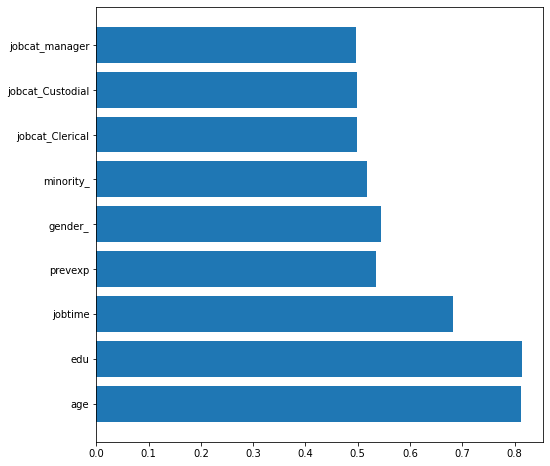

In [37]:
plt.figure(figsize=(8, 8))
plt.barh(permutation_based_importance.index, permutation_based_importance["average RGE"])